# Boston Housing with Linear Regression


DATASET INFO

    'crim': per capita crime rate by town.
    'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
    'indus': proportion of non-retail business acres per town.
    'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    'nox': nitrogen oxides concentration (parts per 10 million).
    'rm': average number of rooms per dwelling.
    'age': proportion of owner-occupied units built prior to 1940.
    'dis': weighted mean of distances to five Boston employment centres.
    'rad': index of accessibility to radial highways.
    'tax': full-value property-tax rate per $10,000.
    'lstat': lower status of the population (percent).
    'medv': median value of owner-occupied homes in $$1000s


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Importing Data
data = pd.read_csv("/content/Boston.csv")

In [33]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [35]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [47]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [36]:
data.drop('Unnamed: 0', axis = 1, inplace=True)

<Axes: xlabel='rm', ylabel='medv'>

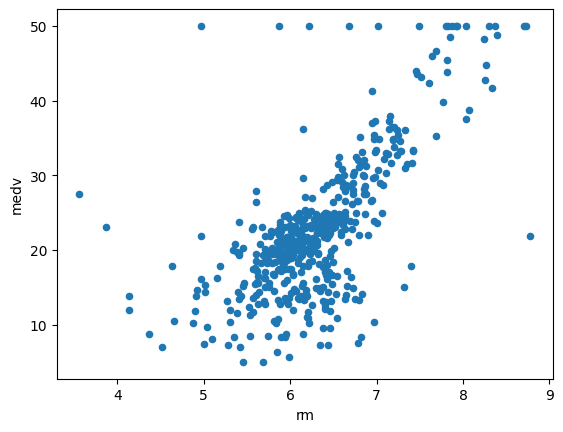

In [37]:
data.plot.scatter('rm', 'medv')

Shows relation between average number of rooms per dwelling vs how expensive the median value is.

<Axes: >

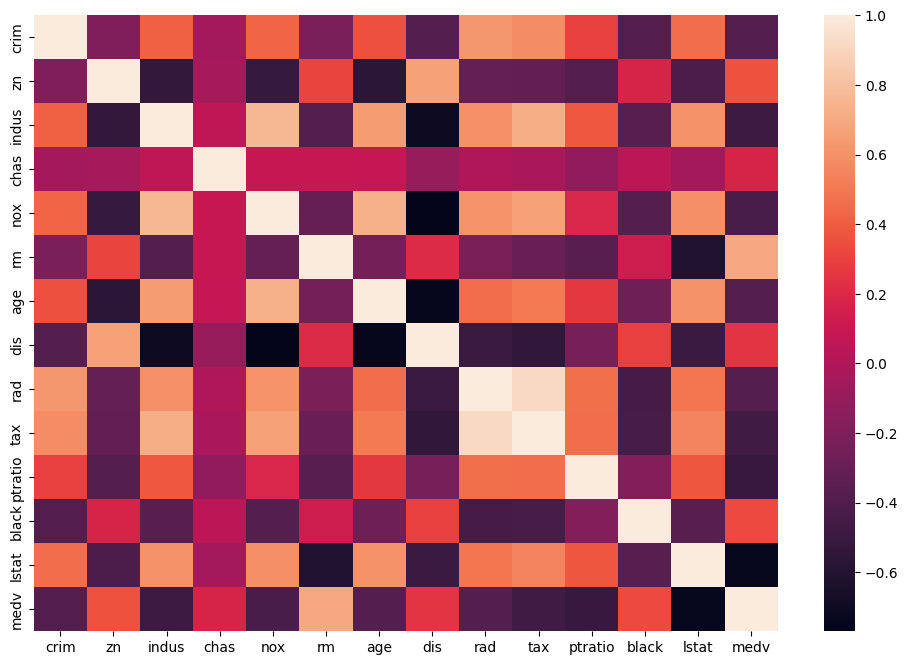

In [38]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr())

This shows correlation between all the features of the dataset. Lighter the colour higher the correlation. Darker the colour lesser the correlation.

#Pairplot for all different correlations

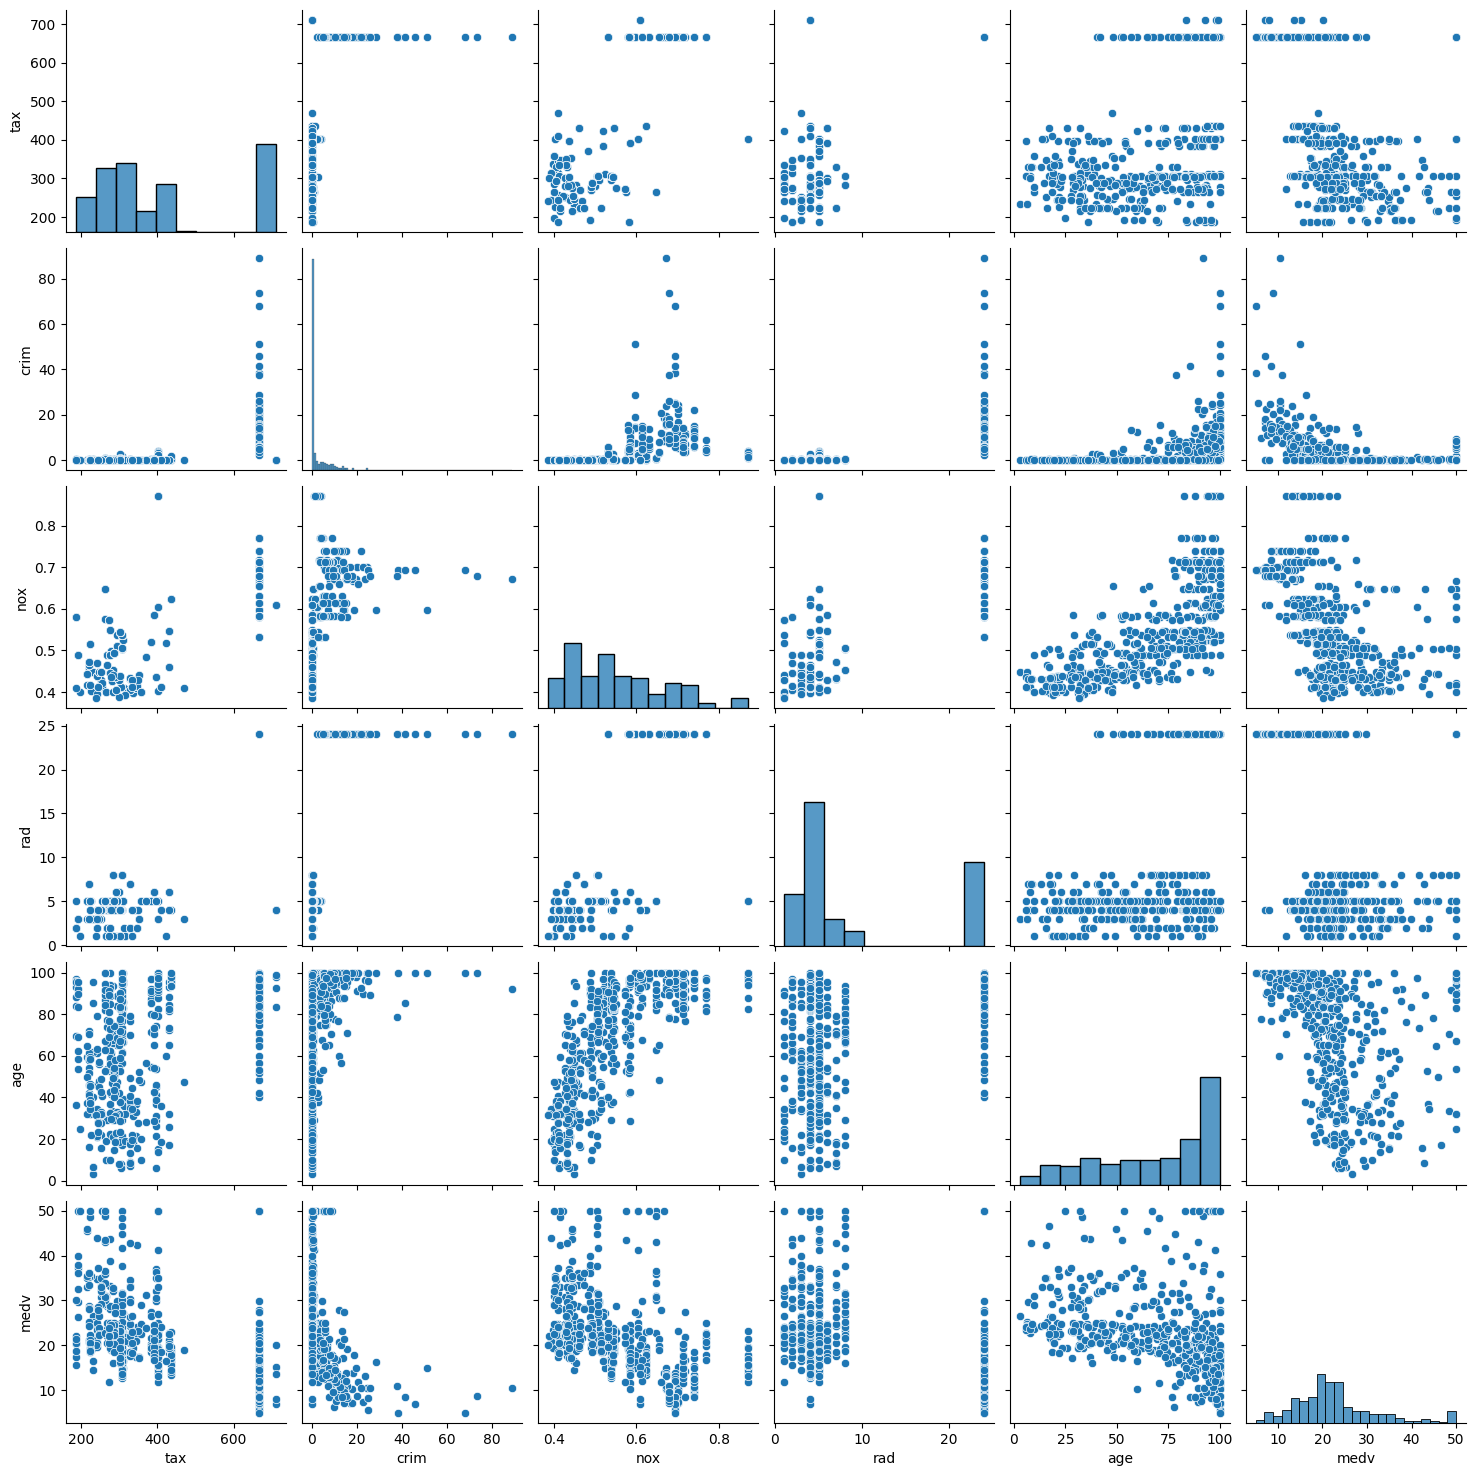

In [39]:
sns.pairplot(data, vars = ['tax', 'crim', 'nox', 'rad', 'age', 'medv'])

# Trainning Linear Regression Model

X:independent variables, features.                                                               
Y:dependent variable

### Training Linear Regression Model with 'lstat'

In [75]:
X_lstat = data[['lstat']]
y_lstat = data['medv']

In [56]:
X_train_lstat, X_test_lstat, y_train_lstat, y_test_lstat = train_test_split(X_lstat, y_lstat, test_size=0.4, random_state=42)

In [57]:
model_lstat = LinearRegression()
model_lstat.fit(X_train_lstat, y_train_lstat)

LinearRegression()

In [58]:
predictions_lstat = model_lstat.predict(X_test_lstat)

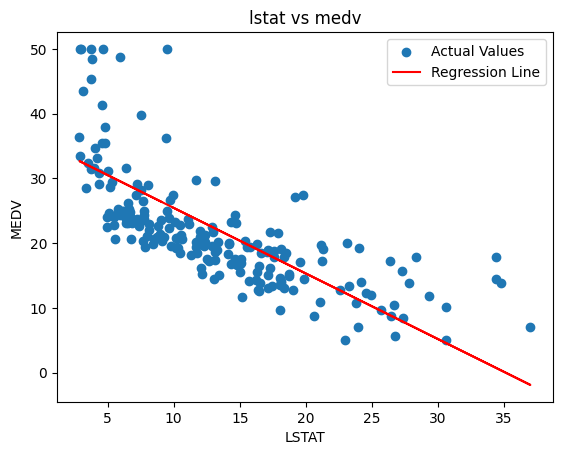

In [82]:
plt.scatter(X_test_lstat, y_test_lstat, label='Actual Values')
plt.plot(X_test_lstat, predictions_lstat, color='red', label='Regression Line')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('lstat vs medv')
plt.legend()
plt.show()

### Model Evaluation: R-squared and Mean Absolute Error

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_lstat = r2_score(y_test_lstat, predictions_lstat)
mae_lstat = mean_absolute_error(y_test_lstat, predictions_lstat)

print(f"\nR-squared (R2) for 'lstat' model: {r2_lstat:.3f}")



R-squared (R2) for 'lstat' model: 0.492


/tmp/ipython-input-2343523966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test_lstat - predictions_lstat), bins=50)


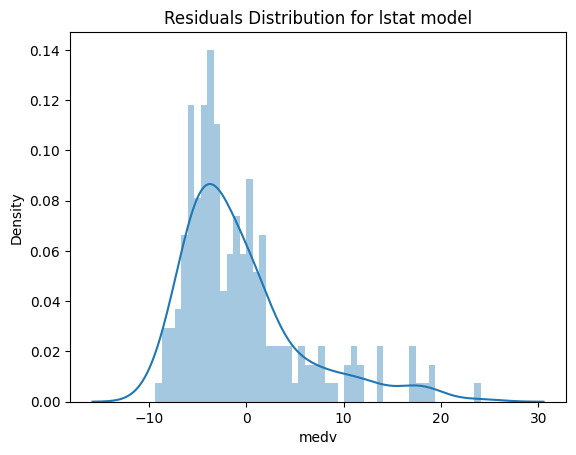

In [81]:
sns.distplot((y_test_lstat - predictions_lstat), bins=50)
plt.title('Residuals Distribution for lstat model')
plt.show()

In [77]:
coefficients_lstat = pd.DataFrame(model_lstat.coef_, X_lstat.columns)
coefficients_lstat.columns = ['coefficients']
print(coefficients_lstat)

       coefficients
lstat     -1.013671


The coefficient for 'lstat' indicates that for every one unit increase in 'lstat' (lower status of the population), the median value of owner-occupied homes ('medv') decreases by the value of the coefficient (in thousands of dollars).